In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions

# Delta GD Interface

In [ ]:
class Delta_GD():
  def __init__(self, eta, num_features, epochs, tolerance):
    self.weights = np.random.normal(loc=0, scale=1, size=1 + num_features) 
    self.eta = eta
    self.tolerance=tolerance
    self.epochs=epochs
    self.MSE=[]
    
    
  def forward(self, xi):
    """
    forward propogation
    """
    z = np.dot(xi, self.weights[1:])+ self.weights[0]
    return self.sigma(z)

  def sigma(self,z):
    return 1.0 / (1.0 + np.exp(-z))


  def deriv_sigma(self,sigma):
    return sigma*(1-sigma)

 
  """backward function"""
  def update_w(self, xi, w, sigma_predict, err):
    deriv_sigma=self.deriv_sigma(sigma_predict)
    g = err * deriv_sigma
    w[1:] += self.eta * g* xi
    w[0] += self.eta*g
    
  def shuffle(self, X, y):
    """Shuffle training data"""
    r = np.random.permutation(len(y))
    return X[r], y[r]



  def evaluate(self, X, y):
    # to compute the prediction accuracy
    return self.MSE



  def predict(self, X):
    """Return class label after unit step"""
        # return a numpy array of predictions (preds) based on your final weights and biases. The
      # dimension should match the number of rows so that it can compare the Class column with the
      # array returned
    preds=self.forward(X)
    return preds
      
  

  

# Online or Stochastic


In [ ]:
class Delta_Online(Delta_GD):
 def train(self, X, y, epochs):
  # to compute the prediction error
  # Note: you can add (variables, arrays, lists etc.) to the definition of self to allow 
  # access to elements across diferent functions.
    self.errors_ = []
    self.epochs_=[]
    

    mse=1
    e=0
    while (e!=self.epochs and not(mse<=self.tolerance)):
      errors=0    
      self.shuffle(X,y)
      for xi, target in zip(X, y):
        sigma_predict = self.forward(xi)
        err = target-sigma_predict
        self.update_w(xi, self.weights, sigma_predict, err)
        errors += abs(err)

      mse= (errors**2)/(2*len(y))
      self.MSE.append(mse)
      self.errors_.append(errors)
      self.epochs_.append(e)
      e+=1

    return self  
      # <your code> to update the weights and bias



# Batch

In [ ]:
class Delta_Batch(Delta_GD):
 def train(self, X, y, epochs):
  #  to compute the prediction error
  # Note: you can add (variables, arrays, lists etc.) to the definition of self to allow 
  # access to elements across diferent functions.
    self.errors_ = []
    self.epochs_=[]
    

    mse=1
    e=0
    while (e!=self.epochs and not(mse<=self.tolerance)):
      errors=0    
      delta_w=self.weights
      self.shuffle(X,y)
      for xi, target in zip(X, y):
        sigma_predict = self.forward(xi)
        err = target-sigma_predict
        self.update_w(xi, delta_w, sigma_predict, err)
        errors += abs(err)
      self.update_w(xi, self.weights, sigma_predict, err)
      mse= (errors**2)/(2*len(y))
      self.MSE.append(mse)
      self.errors_.append(errors)
      self.epochs_.append(e)
      e+=1

    return self  
      #to update the weights and bias



# Load Data


In [ ]:
import pandas as pd
assin_3='/content/drive/Shareddrives/Team 8- Neural Network/Assignment-3/Perceptron_TestData.csv'
ourFile='/content/drive/Shareddrives/Team 8- Neural Network/Assignment-4/Delta_testfile.csv'
df = pd.read_csv(ourFile, header=None)
df.tail()

,0,1,2,3,4
0,x1,x2,x3,x4,Class
1,1,0,1,0,1
2,1,1,1,1,1
3,1,1,1,0,0
4,1,0,0,1,0


In [ ]:
num_col=len(df.columns)
num_row=len(df)
num_feat=num_col-1

y=df.iloc[1:num_row, num_feat].values.astype(float).astype(int)

X = df.iloc[1:num_row, :num_feat].values.astype(float) 


print(X)
print(y)


[[1. 0. 1. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 1.]]
[1 1 0 0]


# Test Online

Final 

Prdiciton: [0.79815377 0.76586657 0.2622466  0.19101207]
Target Y/Actual: [1 1 0 0] 

Last Weights: [-0.49712004 -2.40911941  5.0376836   2.21944113]
Last Bias: -3.1657684874618277


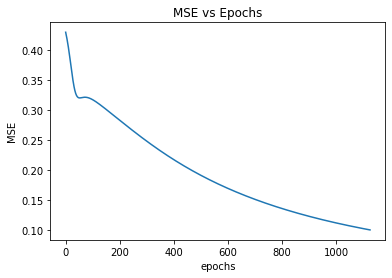

In [ ]:
epochs=10000
ppn = Delta_Online(eta=.1, num_features=X.shape[1], epochs=epochs, tolerance=0.1)

ppn.train(X,y,epochs)





# Showing prediction vs acutal
print('\033[1m'+'\033[4m'+"Final"+'\033[0m \n')


print('\033[1m'+'\033[4m'+"Prdiciton:"+'\033[0m',ppn.predict(X))
print('\033[1m'+'\033[4m'+"Target Y/Actual:"+'\033[0m',y,"\n")


#final weight and bias value
print('\033[1m'+'\033[4m'+"Last Weights:"+'\033[0m',ppn.weights[1:])
print('\033[1m'+'\033[4m'+"Last Bias:"+'\033[0m',ppn.weights[0])

plt.plot(ppn.epochs_,ppn.evaluate(X,y))
plt.title("MSE vs Epochs")
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.show()



# Test Batch


Prdiciton [0.78370074 0.74835947 0.28278351 0.13783779]
Target Y/Actual: [1 1 0 0] 

Last Weights: [-1.58885229 -2.21806044  5.1413081   2.02057795]
Last Bias: -2.265091503492472


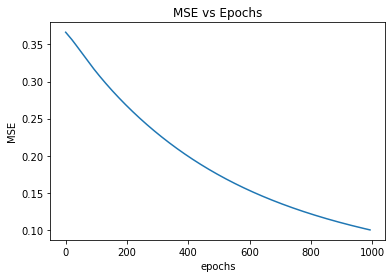

In [ ]:
ppn = Delta_Batch(eta=.1, num_features=X.shape[1], epochs=10000, tolerance=0.1)

ppn.train(X,y,epochs)





# predict vs actual
print('\033[1m'+'\033[4m'+"Prdiciton"+'\033[0m',ppn.predict(X))
print('\033[1m'+'\033[4m'+"Target Y/Actual:"+'\033[0m',y,"\n")


print('\033[1m'+'\033[4m'+"Last Weights:"+'\033[0m',ppn.weights[1:])
print('\033[1m'+'\033[4m'+"Last Bias:"+'\033[0m',ppn.weights[0])

plt.plot(ppn.epochs_,ppn.evaluate(X,y))
plt.title("MSE vs Epochs")
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.show()

# Compare


In [ ]:
def total_epoch():
  """runs each learning and give total epoach needed to reach the tolerance"""
  
  batch = Delta_Batch(eta=.1, num_features=X.shape[1], epochs=2000, tolerance=0.1)

  batch.train(X,y,epochs)

  online = Delta_Online(eta=.1, num_features=X.shape[1], epochs=2000, tolerance=0.1)

  online.train(X,y,epochs)
  return len(batch.epochs_),len(online.epochs_)

online=[]
batch=[]
num_runs=100
e=np.arange(num_runs)
for i in range(num_runs):
  epochs=total_epoch()
  batch.append(epochs[0])
  online.append(epochs[1])

print("online average epochs",sum(online)/num_runs)
print("batch average epochs",sum(batch)/num_runs)


online average epochs 1254.76
batch average epochs 1145.83


Note: Their shuffling of the data are not the same but by average we can see the difference


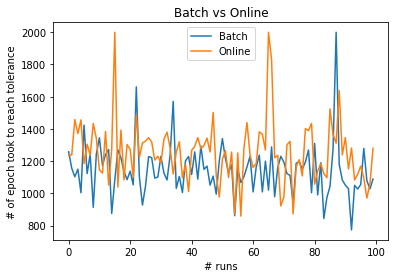

In [ ]:
plt.plot(e, batch)
plt.plot(e, online)
plt.xlabel('# runs')
plt.ylabel('# of epoch took to reach tolerance')
plt.title('Batch vs Online')
plt.legend(['Batch', 'Online'])
print("Note: Their shuffling of the data are not the same but by average we can see the difference")